<a href="https://colab.research.google.com/github/jai2shan/TSAI-EVA40-Assignments/blob/master/Session%2012/ReduceLROnPlateau.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !git clone https://github.com/jai2shan/TSAI-EVA40-Assignments.git

In [2]:
import os
os.chdir(r'/content/TSAI-EVA40-Assignments')
!git pull origin master

From https://github.com/jai2shan/TSAI-EVA40-Assignments
 * branch                master     -> FETCH_HEAD
Already up to date.


In [3]:
import os
os.chdir(r'/content/TSAI-EVA40-Assignments/Session 12/Scripts')

In [4]:
import torch
import torchvision
import os
from torchvision import transforms
from DataLoader import *

os.chdir(r'/content/TSAI-EVA40-Assignments/Session 12/Data')
train_path = 'train'
test_path = 'test'
train_loader,test_loader = data_loader_(train_path,test_path,256)

In [5]:
import torch
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

os.chdir(r'/content/TSAI-EVA40-Assignments/Session 12/Scripts')
from resnet import ResNet18
net = ResNet18(num_classes = 200).to(device)
summary(net, input_size=(3,64,64))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
            Conv2d-3           [-1, 64, 64, 64]          36,864
       BatchNorm2d-4           [-1, 64, 64, 64]             128
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
        BasicBlock-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
           Conv2d-10           [-1, 64, 64, 64]          36,864
      BatchNorm2d-11           [-1, 64, 64, 64]             128
       BasicBlock-12           [-1, 64, 64, 64]               0
           Conv2d-13          [-1, 128, 32, 32]          73,728
      BatchNorm2d-14          [-1,


Learning rate search finished. See the graph with {finder_name}.plot()


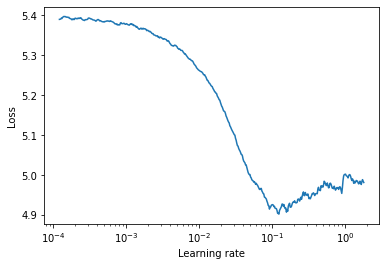

0.12425909700992077

In [6]:
from LR_Finder import *
from Training_Testing import *
tt = TrainTest()
os.chdir(r'/content/TSAI-EVA40-Assignments/Session 12/Data')

test_acc = 0
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001)
# scheduler = StepLR(optimizer, step_size=30, gamma=0.1)

lr_finder = LRFinder(net, optimizer, criterion)
lr_finder.range_test(train_loader, end_lr=2, num_iter=500,step_mode="exp")
lr_finder.plot()

import pandas as pd
lr_ = pd.DataFrame(lr_finder.history)
lr_max = lr_.loc[lr_['loss']==lr_['loss'].min(),'lr'].values[0]
lr_max

In [7]:
os.chdir(r'/content/TSAI-EVA40-Assignments/Session 12/Scripts')
from Training_Testing import TrainTest
import torch.optim as optim
import torch.nn as nn
from torch.optim.lr_scheduler import ReduceLROnPlateau
os.chdir(r'/content/TSAI-EVA40-Assignments/Session 12/Data')

net = ResNet18(num_classes = 200).to(device)
tt = TrainTest()
test_acc = 0
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr_max, momentum=0.9,weight_decay = 0.0005)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, verbose=True)

for epoch in range(50):
    print("EPOCH:", epoch)
    tt.train_(net, device, train_loader, optimizer, criterion, epoch,L1 = False)
    acc = tt.test_(net, device, test_loader)  
    scheduler.step(tt.test_losses[epoch])
       
print('Finished Training')

  0%|          | 0/274 [00:00<?, ?it/s]

EPOCH: 0


Loss=4.266138553619385 Batch_id=273 Accuracy=4.25: 100%|██████████| 274/274 [05:52<00:00,  1.29s/it]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: -1.8039, Accuracy: 1892/30000 (6.31%)

EPOCH: 1


Loss=4.065781593322754 Batch_id=273 Accuracy=10.30: 100%|██████████| 274/274 [05:53<00:00,  1.29s/it]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: -3.0192, Accuracy: 3470/30000 (11.57%)

EPOCH: 2


Loss=3.5922999382019043 Batch_id=273 Accuracy=16.54: 100%|██████████| 274/274 [05:54<00:00,  1.29s/it]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: -3.7982, Accuracy: 5830/30000 (19.43%)

EPOCH: 3


Loss=3.462224245071411 Batch_id=273 Accuracy=21.48: 100%|██████████| 274/274 [05:53<00:00,  1.29s/it]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: -4.7569, Accuracy: 6568/30000 (21.89%)

EPOCH: 4


Loss=3.089573383331299 Batch_id=273 Accuracy=25.76: 100%|██████████| 274/274 [05:53<00:00,  1.29s/it]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: -4.6756, Accuracy: 6661/30000 (22.20%)

EPOCH: 5


Loss=2.8508827686309814 Batch_id=273 Accuracy=29.49: 100%|██████████| 274/274 [05:53<00:00,  1.29s/it]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: -5.0314, Accuracy: 7907/30000 (26.36%)

EPOCH: 6


Loss=2.867187976837158 Batch_id=273 Accuracy=32.91: 100%|██████████| 274/274 [05:52<00:00,  1.29s/it]
  0%|          | 0/274 [00:00<?, ?it/s]


Test set: Average loss: -5.7620, Accuracy: 9800/30000 (32.67%)

EPOCH: 7


Loss=2.7876341342926025 Batch_id=170 Accuracy=35.17:  62%|██████▏   | 171/274 [03:40<02:12,  1.28s/it]

RuntimeError: ignored